Have obtained the tf/idf matrix, we can now train the model

In [10]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearnex import patch_sklearn 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)
#improve performance of SCM
patch_sklearn()

2023-01-06 21:55:19,242 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-06 21:55:19,251 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [11]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

2023-01-06 21:55:19,305 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-06 21:55:19,308 | INFO : sklearn.model_selection.train_test_split: running accelerated version on CPU


In [15]:
t = time.time()
_C = 0.5
classifier = SVC(kernel='linear', C = _C)
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
#save_pickle_object(classifier, gl.pkl_classifier_SVM)


2023-01-06 22:01:17,600 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
train time: 2.798734426498413


2023-01-06 22:01:25,097 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU


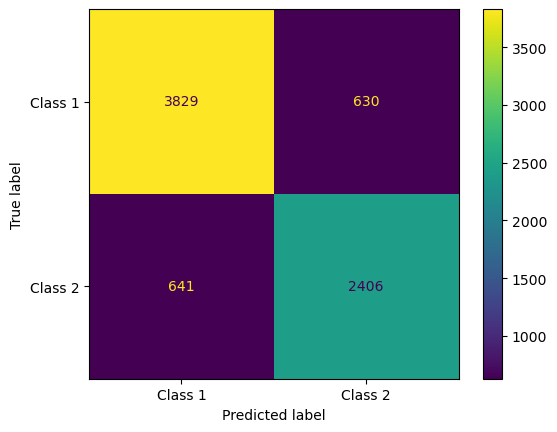

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.79      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [16]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

In [18]:
t = time.time()
classifier = SVC(kernel='linear', C = _C, class_weight="balanced")
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
#save_pickle_object(classifier, gl.pkl_classifier_balanced_SVM)

2023-01-06 22:01:46,581 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
train time: 2.7436470985412598


2023-01-06 22:02:07,970 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU


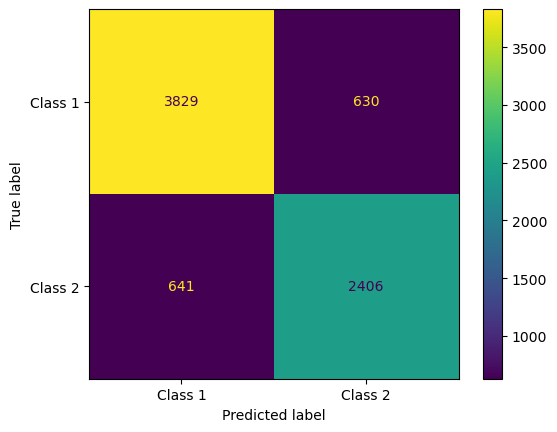

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.79      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [19]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The results are very similar to the baseline solution. There is no overall improvement in using class-weight = "balanced".

Now try bigrams, trigrams, stemming and lemmatization

2023-01-06 22:02:39,412 | INFO : Calculating for Bigram...
2023-01-06 22:02:39,413 | INFO : Loading pickle file from: pickle\pkl_X_bigram_tfidf.pkl
2023-01-06 22:02:39,426 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-06 22:02:39,431 | INFO : sklearn.model_selection.train_test_split: running accelerated version on CPU
2023-01-06 22:02:39,434 | INFO : sklearn.svm.SVC.fit: running accelerated version on CPU
train time: 7.687525272369385
2023-01-06 22:02:47,121 | INFO : sklearn.svm.SVC.predict: running accelerated version on CPU
2023-01-06 22:02:49,626 | INFO : Results for Bigram.


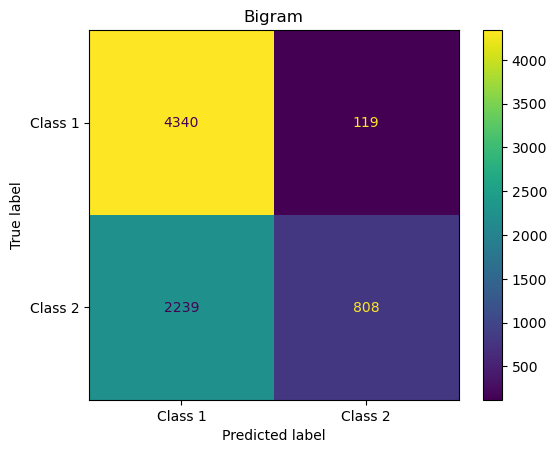

              precision    recall  f1-score   support

     Class 1       0.66      0.97      0.79      4459
     Class 2       0.87      0.27      0.41      3047

    accuracy                           0.69      7506
   macro avg       0.77      0.62      0.60      7506
weighted avg       0.75      0.69      0.63      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.36.
2023-01-06 22:02:49,807 | INFO : Calculating for Trigram...
2023-01-06 22:02:49,807 | INFO : Loading pickle file from: pickle\pkl_X_trigram_tfidf.pkl
2023-01-06 22:02:49,820 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-06 22:02:49,824 | INFO : sklearn.model_selection.train_test_split: running accelerated versi

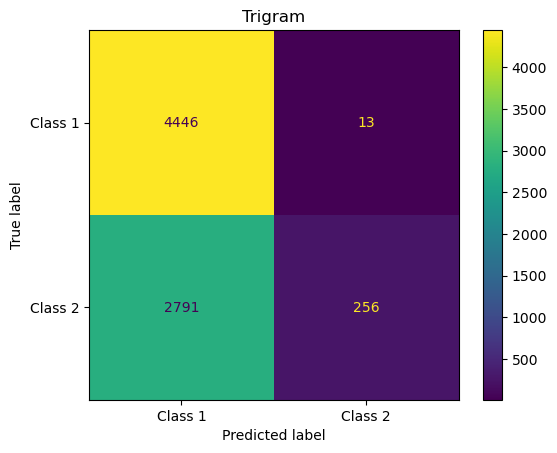

              precision    recall  f1-score   support

     Class 1       0.61      1.00      0.76      4459
     Class 2       0.95      0.08      0.15      3047

    accuracy                           0.63      7506
   macro avg       0.78      0.54      0.46      7506
weighted avg       0.75      0.63      0.51      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.21.
2023-01-06 22:03:02,670 | INFO : Calculating for Stemming...
2023-01-06 22:03:02,672 | INFO : Loading pickle file from: pickle\pkl_X_stem_tfidf.pkl
2023-01-06 22:03:02,684 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-06 22:03:02,697 | INFO : sklearn.model_selection.train_test_split: running accelerated version

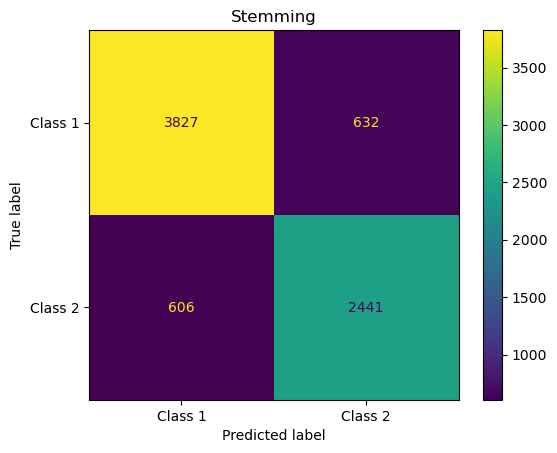

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.79      0.80      0.80      3047

    accuracy                           0.84      7506
   macro avg       0.83      0.83      0.83      7506
weighted avg       0.84      0.84      0.84      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.66.
2023-01-06 22:03:05,513 | INFO : Calculating for Lemmatization...
2023-01-06 22:03:05,514 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
2023-01-06 22:03:05,527 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-06 22:03:05,537 | INFO : sklearn.model_selection.train_test_split: running accelerated ver

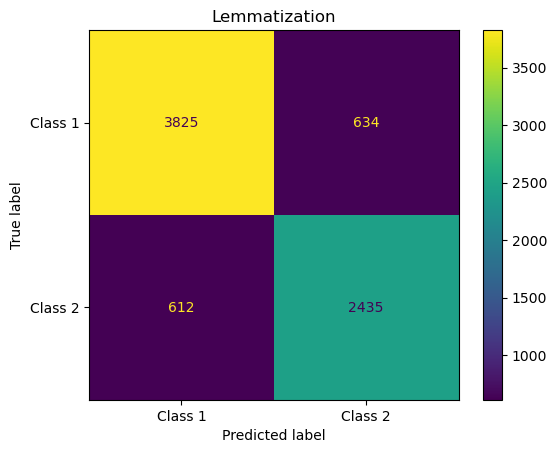

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.79      0.80      0.80      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.83      0.83      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.66.


In [20]:
pickle_input = [(gl.pkl_X_bigram_tfidf, "Bigram"), (gl.pkl_X_trigram_tfidf, "Trigram"), (gl.pkl_X_stem_tfidf, "Stemming"), (gl.pkl_X_lem_tfidf, "Lemmatization")]
for pkl, title in pickle_input:
    logging.info(f"Calculating for {title}...")
    X_tfidf = load_pickle_object(pkl)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)
    t = time.time()
    classifier = SVC(kernel='linear', C = _C, random_state=42)
    classifier.fit(X_train, y_train)
    training_time = time.time() - t
    print(f"train time: {training_time}" )
    y_pred = classifier.predict(X_test)
    logging.info(f"Results for {title}.")
    display_metrics(y_test, y_pred, title)

The results are remarkably similar to the baseline logistic regression model. The bigram results were poor, the trigram results even worse.<br/>
Both stemming and lemmatization gives a small improvement.

Use Gridsearch to find the best value for the hyperparameter C

In [9]:
params = {"C": [0.1, 0.3, 0.5, 0.7, 0.9, 1]}
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), params)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

SVC(C=0.5, kernel='linear', random_state=42)

The best value for C is 0.5